In [1]:
import numpy as np
print("Numpy version: "+np.__version__)
%matplotlib inline
import matplotlib.pylab as plt
print("Matplotlib version: "+plt.__version__)

from sklearn.datasets import make_moons, make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

Numpy version: 1.13.0
Matplotlib version: 1.13.0


## Data generation

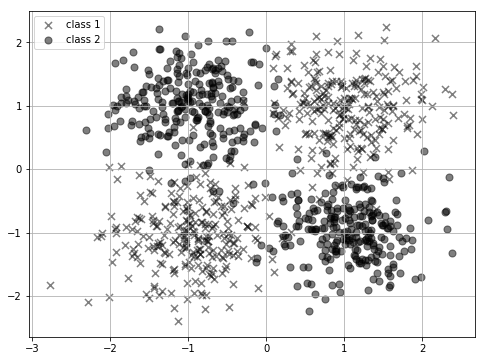

In [2]:
N = 1000
noise_std = 0.25
#X, Y = make_moons(n_samples=N, noise=noise_std)
#X, Y = make_classification(n_samples=N, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2)
X, Y = make_blobs(n_samples=N, centers=[[1, 1], [-1, 1], [1, -1], [-1, -1]], cluster_std=0.5)
Y[Y==2] = 1.0
Y[Y==3] = 0.0 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', 
           s=50, alpha=0.5, label='class 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', 
           s=50, alpha=0.5, label='class 2')
plt.legend()
plt.grid()


In [3]:
# Simple train, test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.25, test_size=0.75)
# Create meshgrid for the probability plots
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

## Bagging Classifier

- Ensamble where T weak learners are trained in parallel with different subsets of data
- The subsets are bootstrap selection of the whole set
- In the bootstrap subset some of the samples may appear more than once while others might not appear at all
- Variance is reduced with more weak learners. Try n_estimators = {1, 20, 100}
- Bagging benefits from using complex weak learners. Compare max_depth = {1, 10}

Classification score:
Train: 1.000000
Test: 0.921333


(0.0, 1.05)

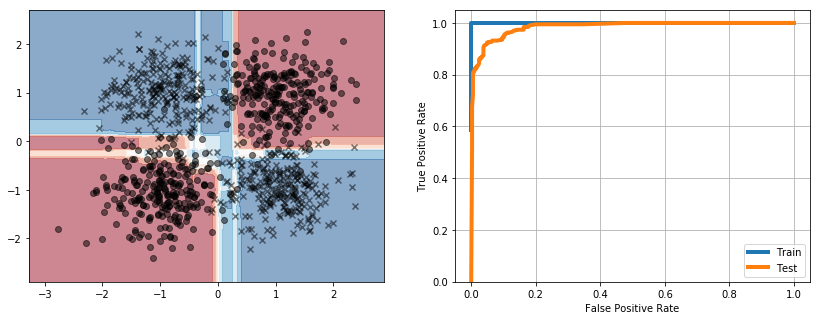

In [4]:
#np.random.seed(0)
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                          n_jobs=2, max_features=1.0, n_estimators=100, bootstrap=True)

model.fit(X_train, Y_train)
print("Classification score:")
print("Train: %f" % (model.score(X_train, Y_train)))
print("Test: %f" % (model.score(X_test, Y_test)))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], color='k', marker='o', alpha=0.5)
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='k', marker='x', alpha=0.5)
ax = fig.add_subplot(1, 2, 2)
fpr, tpr, th = roc_curve(Y_train, model.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, label='Train', linewidth=4)
fpr, tpr, th = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
ax.plot(fpr, tpr, label='Test', linewidth=4)
plt.grid()
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.set_ylim([0.0, 1.05])

## Random Forest

- Decision trees trained in parallel in bootstrap subsets of the data (like bagging)
- Trees are trained using a subset of the features

Classification score:
Train: 1.000000
Test: 0.933333


(0.0, 1.05)

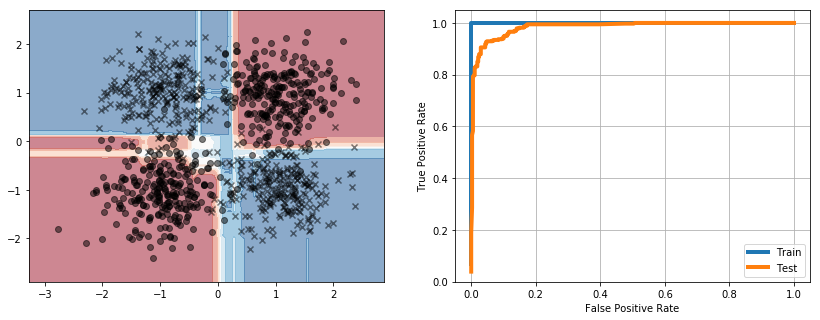

In [5]:
#np.random.seed(0)
model = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='entropy',
                               n_jobs=2, max_features=2)

model.fit(X_train, Y_train)
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
print("Classification score:")
print("Train: %f" % (model.score(X_train, Y_train)))
print("Test: %f" % (model.score(X_test, Y_test)))

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], color='k', marker='o', alpha=0.5)
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='k', marker='x', alpha=0.5)
ax = fig.add_subplot(1, 2, 2)
fpr, tpr, th = roc_curve(Y_train, model.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, label='Train', linewidth=4)
fpr, tpr, th = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
ax.plot(fpr, tpr, label='Test', linewidth=4)
plt.grid()
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.set_ylim([0.0, 1.05])